# Principal Component Analysis with Cancer Data

In [240]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [241]:
raw_data = pd.read_csv('breast-cancer-wisconsin-data.csv')
raw_data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [242]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [243]:
data = raw_data.drop(columns='ID')
data.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [244]:
print(data.dtypes)

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [245]:
data.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [246]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [247]:
data=data.drop_duplicates()
data.isnull().any()

ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [248]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [249]:
data['Bare Nuclei'] = data['Bare Nuclei'].replace(data[~data['Bare Nuclei'].str.isdigit()]['Bare Nuclei'],np.NaN)

In [250]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [251]:
data['Bare Nuclei'].fillna(method='ffill',inplace=True)
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [252]:
# Check for correlation of variable

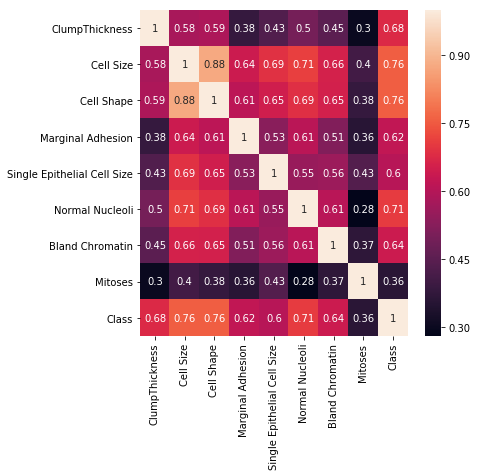

In [253]:
plt.figure(figsize=(6,6))
corr=data.corr()
sns.heatmap(corr, annot=True)

In [254]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [255]:
#Let us check for pair plots

C:\Users\Vicci\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Vicci\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


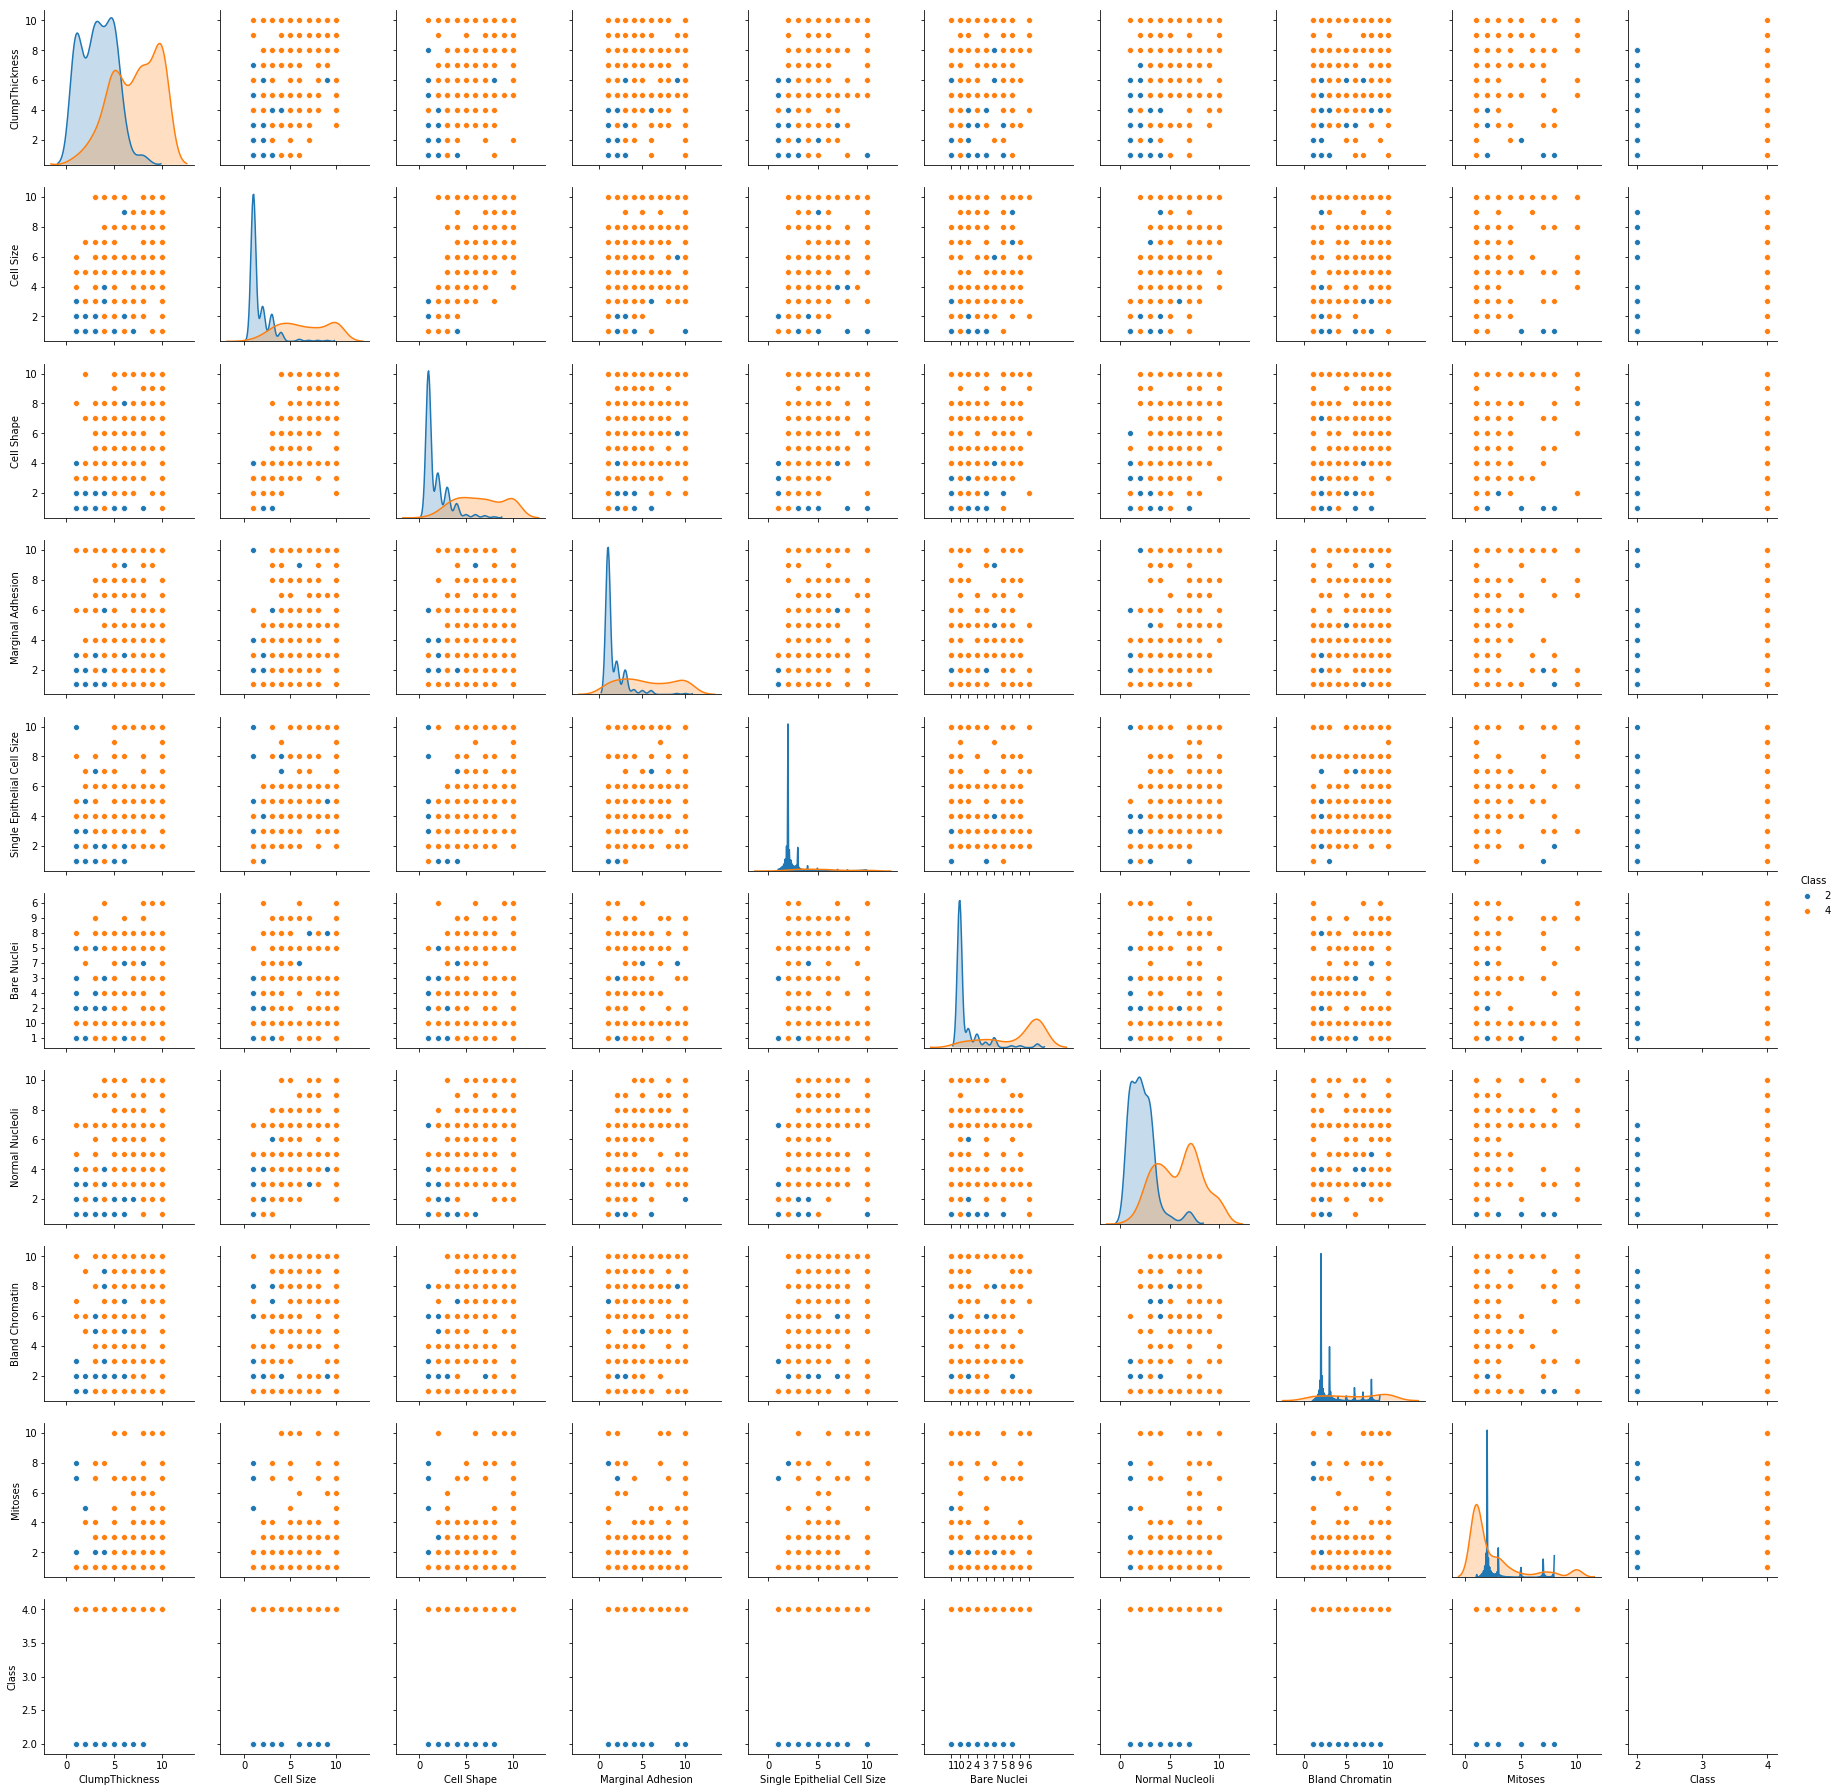

In [256]:
#importing seaborn for statistical plots
import seaborn as sns

# Pairplot using sns
sns.pairplot(data, hue = "Class")

In [257]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [258]:
out_compare = pd.DataFrame(columns=['Column_name'])

col=data.select_dtypes(exclude='object').columns

for i in range(len(col)):
  factor=2
  upper_lmt=data[col[i]].mean()+data[col[i]].std()*factor
  lower_lmt=data[col[i]].mean()-data[col[i]].std()*factor
  out_compare.loc[i,'Column_name']=col[i]
  out_compare.loc[i,'upper_lmt']=upper_lmt
  out_compare.loc[i,'lower_lmt']=lower_lmt
  out_compare.loc[i,'upper_outlier(%)']='{0:=5.2f} %'.format((data[(data[col[i]]>upper_lmt)==True][col[i]].count()/data[col[i]].count())*100)
  out_compare.loc[i,'lower_outlier(%)']='{0:<5.2f} %'.format((data[(data[col[i]]<lower_lmt)==True][col[i]].count()/data[col[i]].count())*100)


out_compare = out_compare.sort_values(by=['upper_outlier(%)','lower_outlier(%)'],ascending=False)
out_compare.set_index('Column_name',inplace=True)
out_compare

#Capping the outlier rows with Percentiles
#upper_lim = data['column'].quantile(.95)
#lower_lim = data['column'].quantile(.05)

,upper_lmt,lower_lmt,upper_outlier(%),lower_outlier(%)
Column_name,,,,
Marginal Adhesion,9.995705,-2.613415,11.88 %,0.00 %
Mitoses,5.972180,-2.201122,7.34 %,0.00 %
Single Epithelial Cell Size,8.734000,-1.053655,6.91 %,0.00 %
Normal Nucleoli,9.448630,-1.107377,4.32 %,0.00 %
ClumpThickness,11.071478,-0.423530,0.00 %,0.00 %
Cell Size,10.654237,-2.304345,0.00 %,0.00 %
Cell Shape,10.483275,-2.003794,0.00 %,0.00 %
Bland Chromatin,10.574360,-2.967449,0.00 %,0.00 %
Class,5.029452,1.026704,0.00 %,0.00 %


In [259]:
col=data.select_dtypes(exclude='object').columns
out_fx_compare = pd.DataFrame(columns=['Column_name'])

for i in range(len(col)):
  #repl_value = out_compare.loc[col[i],'upper_lmt']
  repl_value = data[col[i]].mean()
  #print('column {}:- has mean value {}'.format(col[i],repl_value))
  data[col[i]].replace(data[(data[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]],repl_value,inplace=True)  ## value replacement
  #data_train[col[i]].replace(data_train[(data_train[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]],repl_value,inplace=True)  ## value replacement
 
  out_fx_compare.loc[i,'Column_name']=col[i]
  out_fx_compare.loc[i,'upper_lmt_old']=out_compare.loc[col[i],'upper_lmt']
  out_fx_compare.loc[i,'lower_lmt_old']=out_compare.loc[col[i],'lower_lmt']
  out_fx_compare.loc[i,'upper_outlier_nw(%)']='{0:=5.2f} %'.format((data[(data[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]].count()/data[col[i]].count())*100)
  out_fx_compare.loc[i,'lower_outlier_nw(%)']='{0:<5.2f} %'.format((data[(data[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]].count()/data[col[i]].count())*100)
 
out_fx_compare = out_fx_compare.sort_values(by=['upper_lmt_old'],ascending=False)
out_fx_compare.set_index('Column_name',inplace=True)
out_fx_compare

,upper_lmt_old,lower_lmt_old,upper_outlier_nw(%),lower_outlier_nw(%)
Column_name,,,,
ClumpThickness,11.071478,-0.423530,0.00 %,0.00 %
Cell Size,10.654237,-2.304345,0.00 %,0.00 %
Bland Chromatin,10.574360,-2.967449,0.00 %,0.00 %
Cell Shape,10.483275,-2.003794,0.00 %,0.00 %
Marginal Adhesion,9.995705,-2.613415,0.00 %,0.00 %
Normal Nucleoli,9.448630,-1.107377,0.00 %,0.00 %
Single Epithelial Cell Size,8.734000,-1.053655,0.00 %,0.00 %
Mitoses,5.972180,-2.201122,0.00 %,0.00 %
Class,5.029452,1.026704,0.00 %,0.00 %


In [260]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [261]:
# PCA
# Step 1 - Create covariance matrix

In [262]:
array = data.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [263]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

In [264]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00309598 0.58848177 0.60420706 0.38004968 0.4154614  0.4923042
  0.50872877]
 [0.58848177 1.00309598 0.86552049 0.61434134 0.67214476 0.57691426
  0.61768594]
 [0.60420706 0.86552049 1.00309598 0.5370009  0.62339048 0.59104765
  0.58327489]
 [0.38004968 0.61434134 0.5370009  1.00309598 0.49495057 0.53938242
  0.56926001]
 [0.4154614  0.67214476 0.62339048 0.49495057 1.00309598 0.47993991
  0.47425153]
 [0.4923042  0.57691426 0.59104765 0.53938242 0.47993991 1.00309598
  0.60577763]
 [0.50872877 0.61768594 0.58327489 0.56926001 0.47425153 0.60577763
  1.00309598]]


# Q7 Identify eigen values and eigen vector

In [265]:
# Step 2- Get eigen values and eigen vector

In [266]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.33970703  0.00949408  0.62165821  0.44822959 -0.23631181  0.47749119
  -0.11532209]
 [-0.4286088   0.74503775  0.15917012 -0.25082684 -0.16658792 -0.38019288
  -0.02580419]
 [-0.41759463 -0.64805827  0.27648247 -0.17979804 -0.06074326 -0.53101224
  -0.10583747]
 [-0.35324799 -0.10748627 -0.61093851 -0.05790355 -0.56699648  0.2407323
  -0.32806526]
 [-0.35723922 -0.0732141   0.0408461  -0.64301277  0.36441853  0.52712123
   0.20304768]
 [-0.36665988  0.07768817 -0.25383651  0.37785328  0.67706783 -0.05699471
  -0.43663459]
 [-0.37371766 -0.04358949 -0.26910246  0.37981239 -0.00295393 -0.08015179
   0.79707493]]

 Eigen Values 
%s [4.41145081 0.12707385 0.65505814 0.63240374 0.44027973 0.36868967
 0.38671588]


# Q8 Find variance and cumulative variance by each eigen vector

In [267]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 62.82621744  72.1553083   81.16176371  87.43206149  92.93952312
  98.19026222 100.        ]


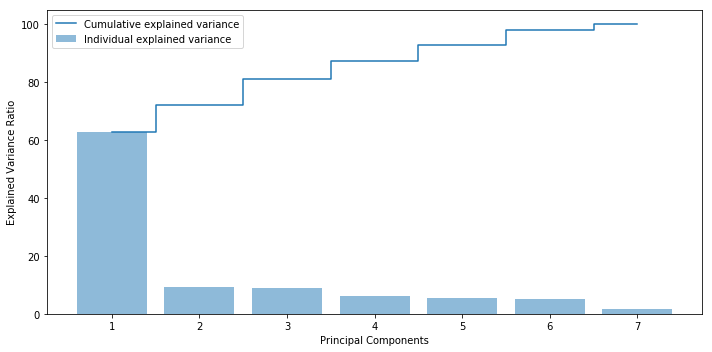

In [268]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [269]:
from sklearn.decomposition import PCA

pca = PCA()

X=pca.fit_transform(X_train_std)

In [270]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.62826217, 0.09329091, 0.09006455, 0.06270298, 0.05507462,
       0.05250739, 0.01809738])

# Q10 Find correlation between components and features

In [271]:
DF=pd.DataFrame(X_train_std)

In [272]:
DF.corr()

,0,1,2,3,4,5,6
0,1.000000,0.586665,0.602342,0.378877,0.414179,0.490785,0.507159
1,0.586665,1.000000,0.862849,0.612445,0.670070,0.575134,0.615779
2,0.602342,0.862849,1.000000,0.535343,0.621466,0.589223,0.581475
3,0.378877,0.612445,0.535343,1.000000,0.493423,0.537718,0.567503
4,0.414179,0.670070,0.621466,0.493423,1.000000,0.478459,0.472788
5,0.490785,0.575134,0.589223,0.537718,0.478459,1.000000,0.603908
6,0.507159,0.615779,0.581475,0.567503,0.472788,0.603908,1.000000


# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [273]:
jokes_data = pd.read_csv('jokes.csv')
jokes_data.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [274]:
jokes=jokes_data.iloc[0:200,1:101]
jokes.shape

(200, 100)

# Q21 Change the column indices from 0 to 99

In [275]:
value=np.arange(0,100)
col=jokes.columns

In [276]:
col_nm=dict(zip(col,value))
jokes.rename(columns= col_nm, inplace=True)
jokes

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [277]:
jokes.replace(99.00,0, inplace=True)

# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [278]:
sc=StandardScaler()

ratings_diff = sc.fit_transform(np.array(jokes))

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [279]:
ratings_diff_pd=pd.DataFrame(ratings_diff)
ratings_diff_pd.mean().nlargest(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64